In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("obama.csv")
data.head()
# Here we have several organisations listed for each month with approval and disproval
# We are aggregating this data by only considering the month

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01,ABC/Post,80.0,15.0
1,2009-01,AP-GFK,74.0,15.0
2,2009-01,CNN,84.0,14.0
3,2009-01,Democracy Corps (D),51.0,20.0
4,2009-01,Diageo/Hotline,64.0,6.5


In [4]:
# The better way to import the data is to add another parameter to the read
# This makes pandas interpret the column as a series of timestamps instead of just strings
# This will make it easier plotting the timeseries
data = pd.read_csv("obama.csv", parse_dates=["year_month"])
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


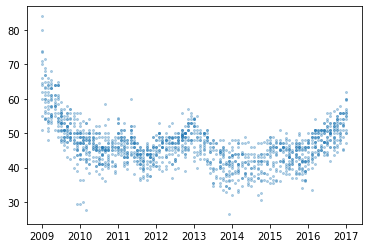

In [7]:
# Plotting the approval ratings over time...
# The lower case 'o' indicates to pandas that the data should be displayed as a series of small, disconnected os
# Without the markersize argument, the graph is too messy 
plt.plot(data.year_month, data.approve_percent, "o", markersize=2, alpha=0.3)
plt.show()

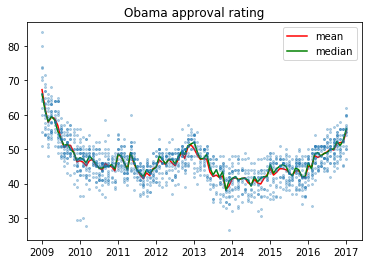

In [10]:
# The graph above is very pretty, we can however do an aggregation easily with pandas
mean_data = data.groupby("year_month").mean()
median_data = data.groupby("year_month").median()

plt.title("Obama approval rating")

plt.plot(mean_data.index, mean_data.approve_percent, "red")
plt.plot(median_data.index, median_data.approve_percent, "green")
plt.legend(["mean", "median"])


plt.plot(data.year_month, data.approve_percent, "o", markersize=2, alpha=0.3)
plt.show()

In [13]:
# Now lets look at the percentiles
# The implementation is the same as in course but getting an error
# Could it be a bug with this version of pandas
percentile_25 = data.groupby("year_month").quantile(0.25)
percentile_75 = data.groupby("year_month").quantile(0.75)

plt.title("Obama approval rating")

plt.plot(percentile_25.index, percentile_25.approve_percent, "red")
plt.plot(percentile_75.index, percentile_75.approve_percent, "green")
plt.legend(["25th Percentile", "75th Percentile"])


plt.plot(data.year_month, data.approve_percent, "o", markersize=2, alpha=0.3)
plt.show()

TypeError: 'quantile' cannot be performed against 'object' dtypes!